## Биомедицинские нанотехнологии и компьютерное зрение (Computer Vision)

<br>

### 2. Поиск объектов на изображении и измерение их линейных размеров 

In [1]:
# Image Processing - OpenCV
# https://docs.opencv.org/3.4/d2/d96/tutorial_py_table_of_contents_imgproc.html

<div align='justify'>Одной из важных задач компьютерного зрения является возможность поиска на изображении отдельных элементов и расчёт их линейных размеров. Например, одной из распространённых задач в медициние является структурный анализ элементов крови. Особенно важным можно назвать микроскопический анализ мазка крови, для которого выполняется анализ эриитроцитов.Благодаря микроскопическому анализу мы можем установить плотность ядерных клеток, распределение клеток и наличие ненормальных клеток. Ниже показан пример мазка крови под микроскопом и модель эритроцита.
</div>

<img width='75%' src='img/cells_micro.jpg'>

<div align='justify'>Показатели гемоглобина (сложный белок для переноса кислорода) и гематокрита (процентный показатель эритроцитов в единице объёма крови) могут указывать на наличие анемии, изучение эритроцитов под микроскопом помогает определить тип анемии. Несмотря на то, что анализ мазка специалистом может предоставить точные данные о размерах эритроцитов и содержании в них гемоглобина, в настоящее время изучение мазка крови автоматическим анализатором является более быстрым и эффективным способом получения информации.</div>

### 2.1. Определение линейных размеров объекта

In [2]:
# Contours in OpenCV
# https://docs.opencv.org/3.4/d3/d05/tutorial_py_table_of_contents_contours.html

# Hough Line Transform
# https://docs.opencv.org/3.4/d6/d10/tutorial_py_houghlines.html
    
# Hough Circle Transform
# https://docs.opencv.org/3.4/da/d53/tutorial_py_houghcircles.html

<div align='justify'>Существует множество способов для определения линейных размеров элементов. Мы рассмотрим наиболее распространённые из них, которые используются в библиотеке OpenCV. Для начала изучим метод контурного выделения элементов изображения. Контур - это линия, которая соединяет все точки на границе объекта или изображения. Контуры помогают определить форму объектов и могут использоваться для их обнаружения и распознавания.
</div>
<div align='justify'>
Для повышения точности анализа рекомендуется использовать бинарные (двоичные) изображения. Перед поиском контуров необходимо применить пороговое значение, для разделения границ элемента и других объектов на изображении. В OpenCV для поиска контуров используется метод findContours(). Поиск контуров аналогичен поиску белого объекта на чёрном фоне. Рекомендуется использовать подход, при котором искомый объект должен быть белым, а фон - чёрным. Далее рассмотрим пример поиска контуров на тестовом изображении.
</div>

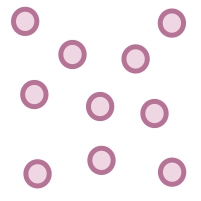

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
 
# Загрузка и чтение изображения из заданной директории
img = cv.imread('data/lab_2/red_blood_cells_model.jpg') 

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)    # Преобразование из BGR в RGB
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # Преобразование из BGR в GRAY

# Визуализация с помощью библиотеки PIL
display(Image.fromarray(img_rgb))

<div align='justify'>
Перед поискои контуров выполним операцию бинаризации изображения. Оставим только два цвета: белый и чёрный. Будеим использовать несколько подходов. Бинаризация на основе пороговой фильтрации, на основе среднего и на основе взвешенной по Гауссу суммы значений окрестности за вычетом константы. Используем метод adaptiveThreshold().
</div>

In [4]:
# Бинаризация изображения
ret, th1 = cv.threshold(img_gray, 155, 255, 0)
th2 = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 21, 10)
th3 = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 21, 3)

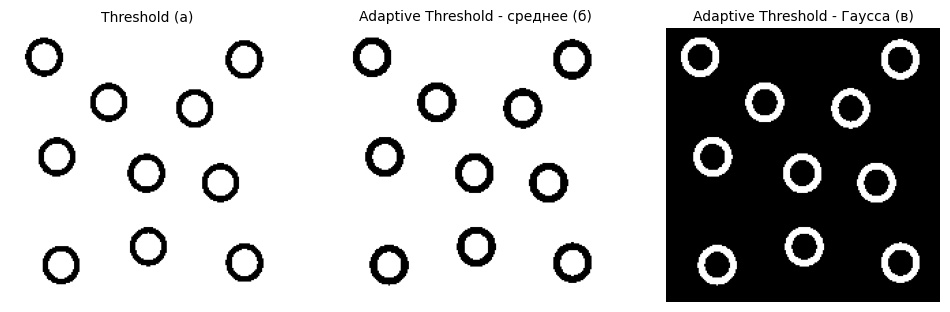

In [5]:
# Визуализация бинаризированного изображения
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 3, 1)
ax.set_title('Threshold (а)', size=10)
ax.imshow(th1, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1, 3, 2)
ax.set_title('Adaptive Threshold - среднее (б)', size=10)
ax.imshow(th2, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1, 3, 3)
ax.set_title('Adaptive Threshold - Гаусса (в)', size=10)
ax.imshow(th3, cmap='gray')
ax.axis('off')

plt.show()

<div align='justify'>
Для поиска контуров будем использовать метод findContours(). Далее мы можем отобразить найденные контуры на исходном изображении, нарисовав их, используя метод drawContours(). Можно нарисовать все контуры, а можно только конкретные, указав их порядковый индекс. Ниже показан пример отрисовки одного контура и всех контуров на изображении.
</div>

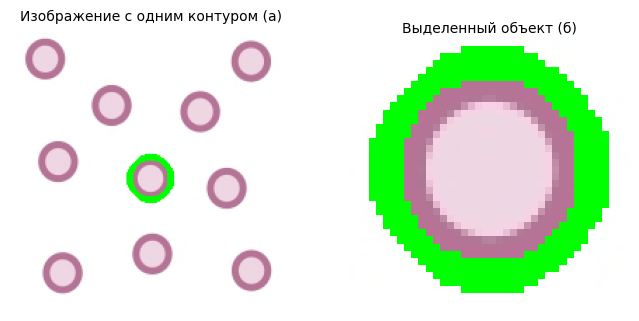

In [6]:
# Выделение элемента по индексу
contours, hierarchy = cv.findContours(th2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[9]
cv.drawContours(img_rgb, [cnt], 0, (0,255,0), 3)

img_rgb_r = img_rgb[88:125, 80:120]     

# Визуализация изображения с шумом и без
fig = plt.figure(figsize=(8, 5))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Изображение с одним контуром (а)', size=10)
ax.grid()
ax.imshow(img_rgb)
ax.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.set_title('Выделенный объект (б)', size=10)
ax.imshow(img_rgb_r)
ax.axis('off')

plt.show()

<div align='justify'>
Теперь найдём линейные размеры анализируемого объекта. Если форма элемента строго определена и известна заранее, то можно рассчитать размеро, используя станадртный метод. Например, нахождение минимального радиуса окружности можно выполнить на основе метода minEnclosingCircle(). Поиск периметра находится с помощью метода arcLength(). Площадь прямоуголника с помощью minAreaRect(). Для нахождения площади фигуры неизвестной формы метод contourArea(), который в качестве переменной принимает индекс найденного контура.
</div>

In [7]:
# Информация об исходном изображении
im = Image.open('data/lab_2/red_blood_cells_model.jpg')
width, height = im.size
dpi = im.info['dpi']

# Расчёт радиуса окружности и площади
area_px = cv.contourArea(cnt)
(x,y), radius_px = cv.minEnclosingCircle(cnt)
radius_px = int(radius_px)

# Линейные размеры изображения (мм)
w_img_mm = 10
h_img_mm = 10

# Расчёт коэффициента пересчёта из пэл -> мм
coeff = h_img_mm/height

# Расчёт радиуса в мм
radius_mm = round(coeff*radius_px, 2)

print(f'Радиус окружности (пэл): {radius_px} пэл')
print(f'Радиус окружности  (мм): {radius_mm} мм')

Радиус окружности (пэл): 15 пэл
Радиус окружности  (мм): 0.75 мм


### 2.2. Определение количества элементов на изображении

<div align='justify'>Для подсчёта количества однотипных элементов можно использовать разные подходы. Например, можно найти все контуры элементов, а потом выполнить фильтрацию и оставить только те, площадь которых соответствует определённому значению. Диапазон для фильтрации будет определяться качеством исходных контуров. Давайте вернёмся к рассмотренному ранее изображению red_blood_cells_model.jpg и выделим все элементы.
</div>

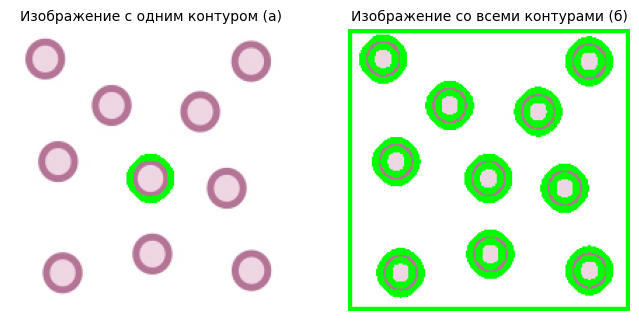

In [8]:
# Поиск контуров элементов на изображение
img_rgb_c = img_rgb.copy()

# Выделение всех элементов на изображении
contours, hierarchy = cv.findContours(th2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_rgb_c, contours, -1, (0,255,0), 3)

# Выделение элемента по индексу
cnt = contours[9]
cv.drawContours(img_rgb, [cnt], 0, (0,255,0), 3)

# Визуализация изображения с шумом и без
fig = plt.figure(figsize=(8, 5))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Изображение с одним контуром (а)', size=10)
ax.imshow(img_rgb)
ax.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.set_title('Изображение со всеми контурами (б)', size=10)
ax.imshow(img_rgb_c)
ax.axis('off')

plt.show()

<div align='justify'>На рисунке (б) показан 21 контур. 20 относится к окружностям и 1 элемент оределён в виде квадрата, что для нас является артефактом, т.к. наша задача сводится к определению окружностей имеющих больший радиус. Ранее нам удалось установить, что нас интересует объект с площадью ~700 пэл. Выполним фильрацию и оставим только близкие по размеру контуры. Определим диапазон значений от 690 до 710 пэл.</div>

In [9]:
# Функция для поиска элементов с заданной площадью

def find_contours(contours, start_px, end_px, coeff):
    '''Функция для поиска элементов с заданной площадью'''
    
    area_circles = []                                       # Список для хранения площади контуров
    contour_circles = []                                    # Список для хранения контуров
    radius_circles = []
    
    for contour in contours:
        
        area_px = cv.contourArea(contour)                   # Расчёт площади контура
        (x,y), radius_px = cv.minEnclosingCircle(contour)   # Расчёт радиуса окружности в пэл
        radius_px = int(radius_px)
        radius_mm = round(coeff*radius_px, 4)               # Расчёт радиуса окружности в мм
        
        if start_px <= area_px <= end_px:                   # Определение диапазона для фильтрации контуров
            contour_circles.append(contour)
            area_circles.append(area_px)
            radius_circles.append(radius_mm)

    return contour_circles, area_circles, radius_circles

start_px = 690 
end_px = 710

circles, areas, radius = find_contours(contours, start_px, end_px, coeff)

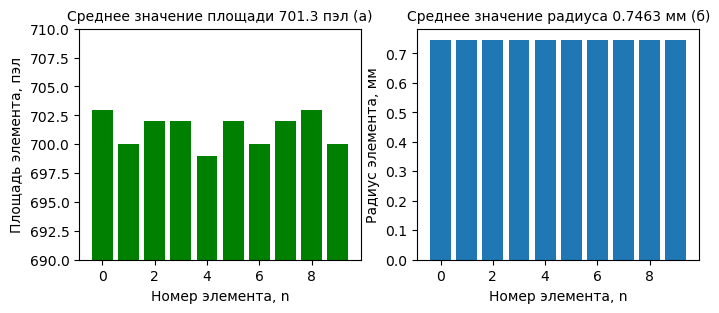

In [10]:
# Визуализация
fig = plt.figure(figsize=(8, 3))

ax = fig.add_subplot(1, 2, 1)
ax.set_title(f'Среднее значение площади {np.mean(areas)} пэл (а)', size=10)
ax.bar(range(len(areas)), areas, color='g')
ax.set_xlabel('Номер элемента, n')
ax.set_ylabel('Площадь элемента, пэл')
ax.set_ylim (start_px, end_px)

ax = fig.add_subplot(1, 2, 2)
ax.set_title(f'Среднее значение радиуса {np.mean(radius)} мм (б)', size=10)
ax.bar(range(len(radius)), radius)
ax.set_xlabel('Номер элемента, n')
ax.set_ylabel('Радиус элемента, мм')

plt.show()

In [11]:
print(f'Среднее значение площади элемента {np.mean(areas)} пэл')
print(f'Среднее значение радиуса окружности {np.mean(radius)} мм')
print(f'Всего найдено {len(circles)} элементов на изображении.')

Среднее значение площади элемента 701.3 пэл
Среднее значение радиуса окружности 0.7463 мм
Всего найдено 10 элементов на изображении.


### 2.3. Поиск элементов по шаблону и подсчёт их количества

In [12]:
# Template Matching
# https://docs.opencv.org/3.4/d4/dc6/tutorial_py_template_matching.html

<div align='justify'>Ещё одним способом поиска элементов на изображении является сопоставление шаблона. Сопоставление шаблона - это процесс поиска и определения положения изображения-шаблона на увеличенном изображении. Для этой цели используется метод matchTemplate. В данном случае изображение-шаблон перемещается поверх входного изображения и сравнивает его с фрагментом входного изображения под шаблоном. После получения результата метод minMaxLoc используется для определения максимального/минимального значения.</div>

In [13]:
# Загрузка изображений
img_rgb = cv.imread('data/lab_2/red_blood_cells_model.jpg')
img_rgb_c = img_rgb.copy()
img_gray = cv.cvtColor(img_rgb_c, cv.COLOR_BGR2GRAY)
template = cv.imread('data/lab_2/red_blood_cells_model_mini.png', cv.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]

# Поиска совпадений по шаблону
result = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)
count = cv.countNonZero(result)

# Порог для фильтрации
threshold = 0.25
loc = np.where(result >= threshold)

figures = set()

# Выделение найденных совпадений на исходном изображении
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb_c, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 1)
    
    sensitivity = 100
    figures.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

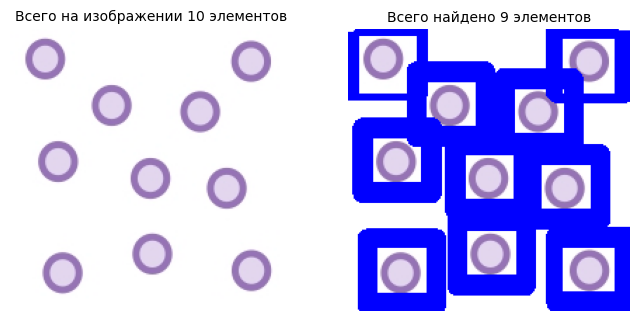

In [14]:
# Визуализация найденных объектов
fig = plt.figure(figsize=(8, 5))

ax = fig.add_subplot(1, 2, 1)
ax.set_title(f'Всего на изображении 10 элементов', size=10)
ax.imshow(img_rgb)
ax.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.set_title(f'Всего найдено {len(figures)} элементов', size=10)
ax.imshow(img_rgb_c)
ax.axis('off')

plt.show()

### Задание для самостоятельной работы.

1. Назовите основные методы в библиотеке OpenCV, которые позволяют проводить измерения линейных размеров элементов на изображении.

2. Используя методы для поиска контуров findContours(), выделите на изображении один, а потом все структурные элементы изображения. В данном случае изображением для анализа является цифровой снимок мазка крови под микроскопом. Линейный размер снимка составляет 85x85 мкм. Используйте изображение red_blood_cells.jpg.

3. Используйте метод matchTemplate() для нахождения изображений по шаблону. Используйте изображение red_blood_cells.jpg. В качестве шаблона используйте изображение red_blood_cells_mini.png. Сравните полученные результаты с предыдущим методом из п.1.

4. Используя методы для поиска контуров findContours(), выделите на изображении все структурные элементы изображения (открытые потовые железы). В данном случае изображением для анализа является цифровой тепловизионный снимок фаланги пальца до и после нагрузочного теста. Линейный размер снимка составляет 10x10 мм. Используйте изображение sweat_glands_before.jpg и sweat_glands_after.jpg.